In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings 
warnings.filterwarnings('ignore')

In [136]:
df = pd.read_csv(r'data\ds_salaries.csv')

In [137]:
df.head(9)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
5,2023,SE,FT,Applied Scientist,222200,USD,222200,US,0,US,L
6,2023,SE,FT,Applied Scientist,136000,USD,136000,US,0,US,L
7,2023,SE,FT,Data Scientist,219000,USD,219000,CA,0,CA,M
8,2023,SE,FT,Data Scientist,141000,USD,141000,CA,0,CA,M


In [138]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

<div align="center">

### **Processing**

</div>

In [6]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [7]:
df.shape[0]

3755

In [8]:
df.duplicated().sum()

np.int64(1171)

In [139]:
df.drop_duplicates(inplace=True) # remove duplicates since they do not provide additional information and may affect the analysis.


<div align="center">

### **EDA**

</div>

In [45]:
df['salary'].max()

np.int64(30400000)

In [46]:
df.groupby('job_title')['salary'].mean().sort_values(ascending=False).round(2)

job_title
Head of Machine Learning          6000000.00
Principal Data Architect          3000000.00
Lead Machine Learning Engineer    2548666.67
Lead Data Scientist                928485.33
Data Analytics Lead                922500.00
                                     ...    
Insight Analyst                     38500.00
Compliance Data Analyst             30000.00
Autonomous Vehicle Technician       26277.50
Staff Data Analyst                  15000.00
Product Data Scientist               8000.00
Name: salary, Length: 93, dtype: float64

<div align="center">

#### *Top 10 Jobs that earn more money*


</div>

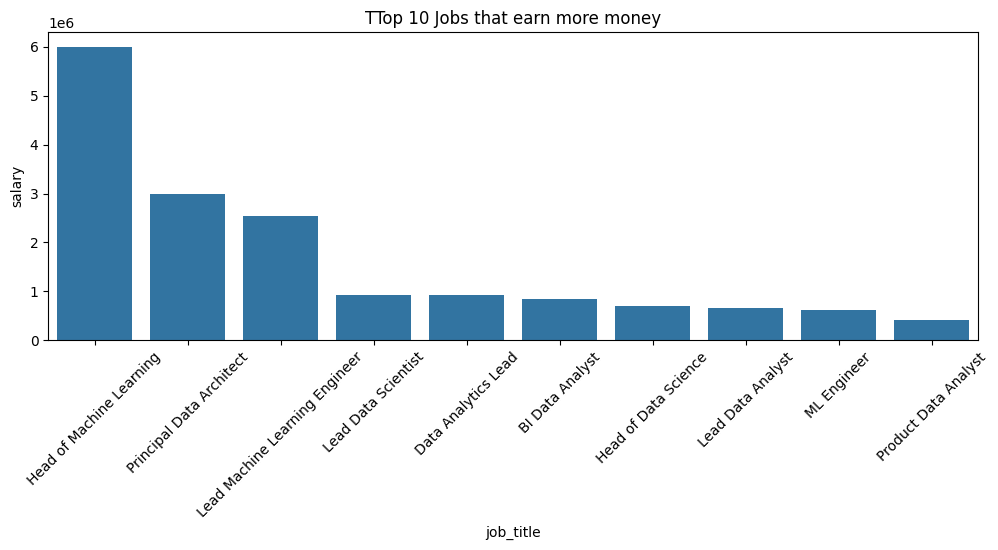

In [167]:
#top 10 
top_10 = df.groupby('job_title')['salary'].mean().sort_values(ascending=False).head(10).reset_index()

# graph bars to visualize the jobs that earn the most money 
plt.figure(figsize=(12,4))
sns.barplot(data=top_10, x='job_title', y='salary')
plt.xticks(rotation=45)
plt.title('TTop 10 Jobs that earn more money')
plt.show()

<div align="center">

#### *¿ What is the type of job that allows more remote work ?*

</div>




In [47]:
df['remote_ratio'].value_counts()

remote_ratio
0      1923
100    1643
50      189
Name: count, dtype: int64

In [48]:
df[df['remote_ratio'] == 100]['job_title'].value_counts()

job_title
Data Engineer                         432
Data Scientist                        380
Data Analyst                          270
Machine Learning Engineer             109
Data Architect                         69
                                     ... 
Lead Machine Learning Engineer          1
Machine Learning Research Engineer      1
Data Scientist Lead                     1
Data Analytics Lead                     1
Staff Data Scientist                    1
Name: count, Length: 75, dtype: int64

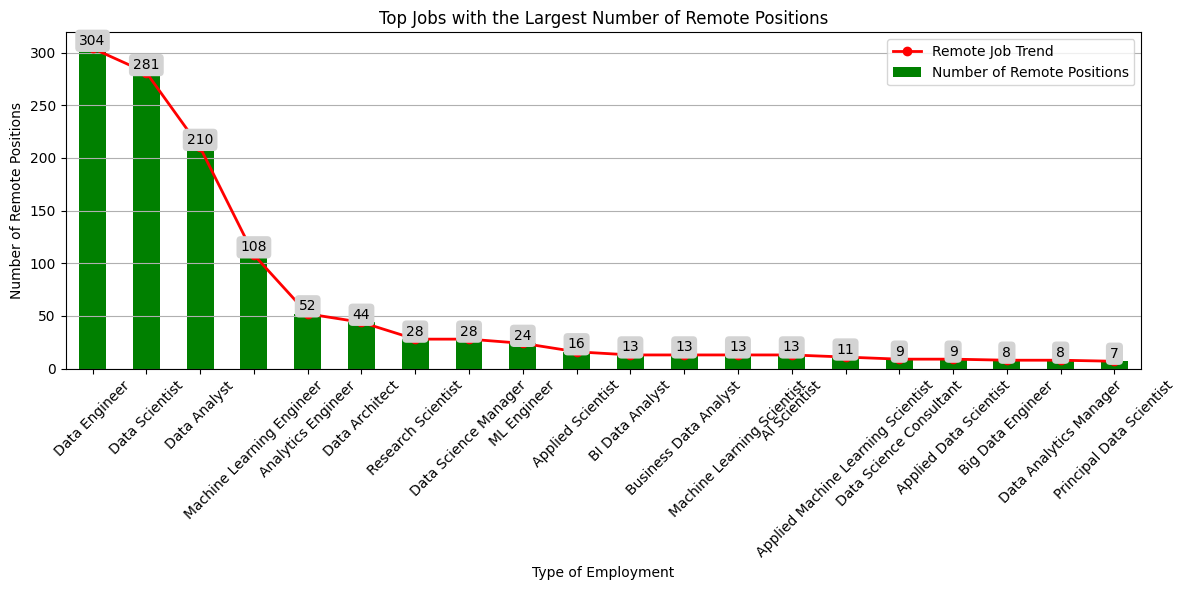

In [144]:

#  Filter to include only rows with remote work
df_remote = df[df['remote_ratio'] > 0]

# Count the number of remote positions by job type
empleo_remote_count = df_remote['job_title'].value_counts().head(20)

# Create a bar chart
plt.figure(figsize=(12, 6))

# Define green color for the bars
bar_color = 'green'

#  Create the bar chart
bars = empleo_remote_count.plot(kind='bar', color=bar_color, label='Number of Remote Positions')
plt.title('Top Jobs with the Largest Number of Remote Positions')
plt.xlabel('Type of Employment')
plt.ylabel('Number of Remote Positions')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Add legend 
plt.legend(loc='upper right')

# Show the total number of remote positions as speech bubbles
for idx, value in enumerate(empleo_remote_count):
    plt.text(idx, value + 0.5, str(value), ha='center', va='bottom', fontsize=10,
             bbox=dict(boxstyle='round,pad=0.3', edgecolor='none', facecolor='lightgray'))

# Add a line connecting the points from the largest to the smallest
plt.plot(empleo_remote_count.index, empleo_remote_count.values, color='red', marker='o', linestyle='-', linewidth=2, label='Remote Job Trend')

# Add legend for the line
plt.legend(loc='upper right')

# Show the graph
plt.tight_layout()
plt.show()


<div align="center">

#### *¿Cual es el salario promedio de los empleados de Data Scientist?*
 

 </div>

In [50]:
df[df['job_title'] == 'Data Scientist']['salary'].mean().round(2)

np.float64(239073.48)

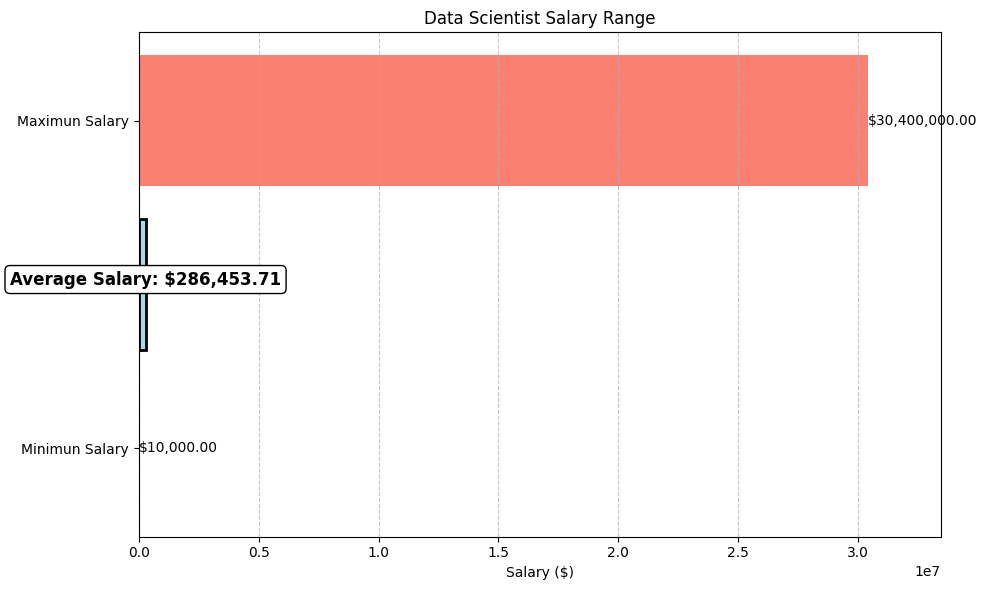

In [155]:
data_scientists = df[df['job_title'] == 'Data Scientist']

minimun_salary = data_scientists['salary'].min()
average_salary = data_scientists['salary'].mean()
maximum_salary = data_scientists['salary'].max()

# Create lists of tags and salaries, reordering for the graph
labels = ['Minimun Salary', 'Average Salary', 'Maximun Salary']
salarys = [minimun_salary, average_salary, maximum_salary]

# Create the bar chart
plt.figure(figsize=(10, 6))
bars = plt.barh(labels, salarys, color=['lightgreen', 'lightblue', 'salmon'])

# Add title and tags
plt.title('Data Scientist Salary Range')
plt.xlabel('Salary ($)')
plt.xlim(0, salario_maximo * 1.1)  # Adjust right limit

# Add annotations for each bar
for bar in bars:
    xval = bar.get_width()
    plt.text(xval, bar.get_y() + bar.get_height()/2, f'${xval:,.2f}', ha='left', va='center')

# Highlight average salary with a border
avg_bar = bars[1]
avg_bar.set_edgecolor('black')
avg_bar.set_linewidth(2)

# Mostrar el salario promedio en un texto destacado
plt.text(average_salary, 1, f'Average Salary: ${average_salary:,.2f}', 
         fontsize=12, color='black', weight='bold', ha='center', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

# Mostrar la gráfica
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()







<div align="center">

#### *¿ How many people earn over 200ks ?*

</div>
 

In [19]:
df[df['salary']>200_000].shape[0]

606

In [53]:
len(df[df['salary']>200_000])

606

In [54]:
sum(df['salary']>200_000)

606

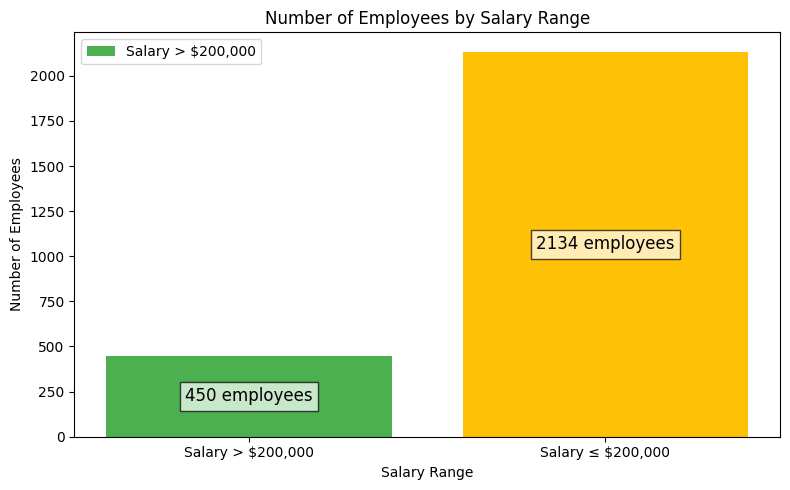

In [161]:
data = {'Salary > $200,000': num_more_200k, 'Salary ≤ $200,000': num_less_200k}
categories = list(data.keys())
values = list(data.values())

# Create the bar chart
plt.figure(figsize=(8, 5))
bars = plt.bar(categories, values, color=['#4CAF50', '#FFC107'])

# Add title and labels
plt.title('Number of Employees by Salary Range')
plt.xlabel('Salary Range')
plt.ylabel('Number of Employees')

for i, value in enumerate(values):
    plt.text(i, value / 2, f'{value} employees', 
             ha='center', va='center', fontsize=12, 
             bbox=dict(facecolor='white', alpha=0.7))

# Add legend
plt.legend(['Salary > $200,000', 'Salary ≤ $200,000'], loc='upper left')
# Show the chart
plt.tight_layout()
plt.show()


<div align="center">

#### *¿ What is the average salary of Data Modeler employees at SE? ?*

</div>

In [122]:
df[ (df['job_title']=='Data Modeler') & (df['experience_level']=='ES')]['salary_in_usd'].mean()


nan

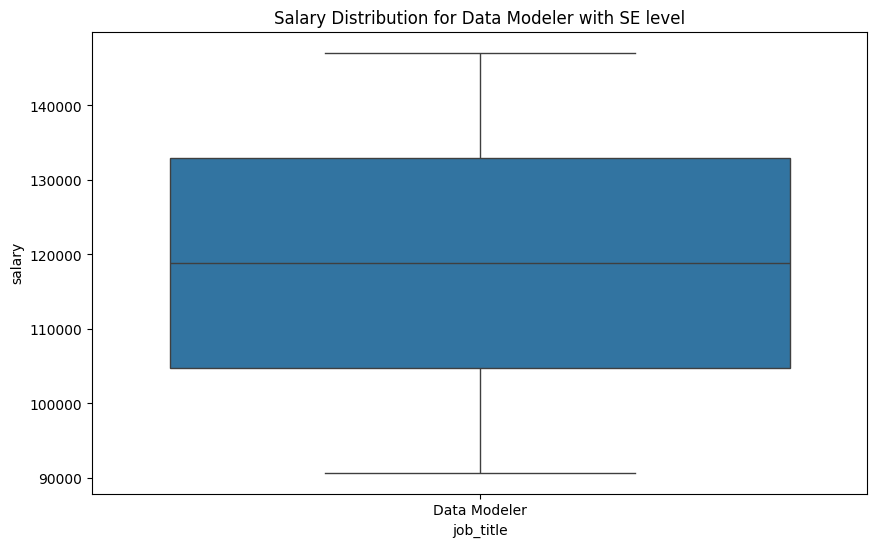

In [162]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='job_title', y='salary', data=df[(df['job_title']=='Data Modeler') & (df['experience_level']=='SE')])
plt.title('Salary Distribution for Data Modeler with SE level')
plt.show()

<div align="center">

#### *For ML Engineers, what is the salary difference between full time and part time?*
 
</div>

In [117]:
salary_FT = df[['employment_type','salary_in_usd']][df['job_title']=='ML Engineer'].groupby('employment_type').mean().loc['FT']
salary_PT = df[['employment_type','salary_in_usd']][df['job_title']=='ML Engineer'].groupby('employment_type').mean().loc['PT']

salary_FT-salary_PT

salary_in_usd    152117.9
dtype: float64

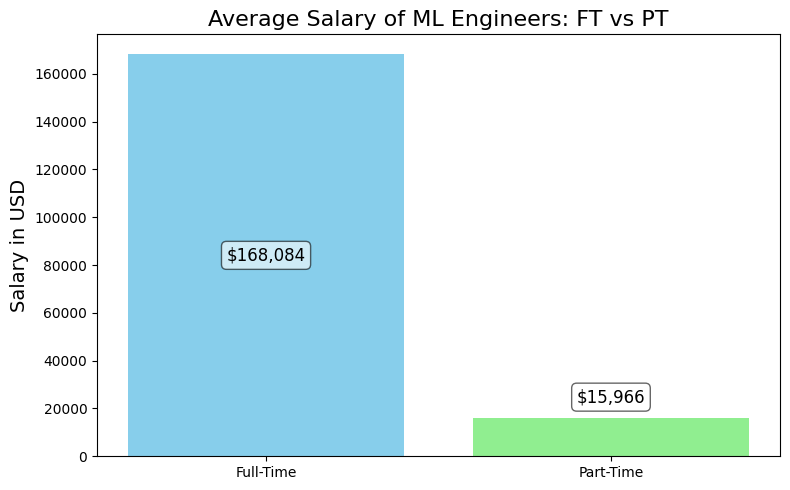

In [121]:
# Calculate average salaries for Full-Time and Part-Time
salary_FT = df[(df['job_title'] == 'ML Engineer') & (df['employment_type'] == 'FT')]['salary_in_usd'].mean()
salary_PT = df[(df['job_title'] == 'ML Engineer') & (df['employment_type'] == 'PT')]['salary_in_usd'].mean()

# Data for the chart
labels = ['Full-Time', 'Part-Time']
salaries = [salary_FT, salary_PT]

# Create the bar chart
plt.figure(figsize=(8, 5))
bars = plt.bar(labels, salaries, color=['skyblue', 'lightgreen'])

# Add title and labels
plt.title('Average Salary of ML Engineers: FT vs PT', fontsize=16)
plt.ylabel('Salary in USD', fontsize=14)

# Add the salary value on the bars in speech bubble format
for i, bar in enumerate(bars):
    yval = bar.get_height()
    if i == 0:  # For Full-Time
        # Position the text in the middle of the bar
        plt.text(bar.get_x() + bar.get_width() / 2, yval / 2, f'${yval:,.0f}', 
                 ha='center', va='center', fontsize=12, 
                 bbox=dict(facecolor='white', alpha=0.6, edgecolor='black', boxstyle='round,pad=0.3'))
    else:  # For Part-Time
        # Position the text above the bar
        plt.text(bar.get_x() + bar.get_width() / 2, yval + 5000, f'${yval:,.0f}', 
                 ha='center', va='bottom', fontsize=12, 
                 bbox=dict(facecolor='white', alpha=0.6, edgecolor='black', boxstyle='round,pad=0.3'))

# Calculate and display the difference
difference_salary = salary_FT - salary_PT
plt.annotate(f'Difference: ${difference_salary:,.0f}', 
             xy=(0.5, max(salaries) + 10000),  # Centered position between the two bars
             fontsize=12, ha='center', color='red')

# Adjust the layout
plt.tight_layout()

# Show the chart
plt.show()




#

<div align="center">

#### *¿ What is the most frequent employment type among Business Data Analysts ?*

</div>

In [58]:
df[df["job_title"]== "Data Analyst"]["employment_type"].mode()
### .mode value more repit


0    FT
Name: employment_type, dtype: object

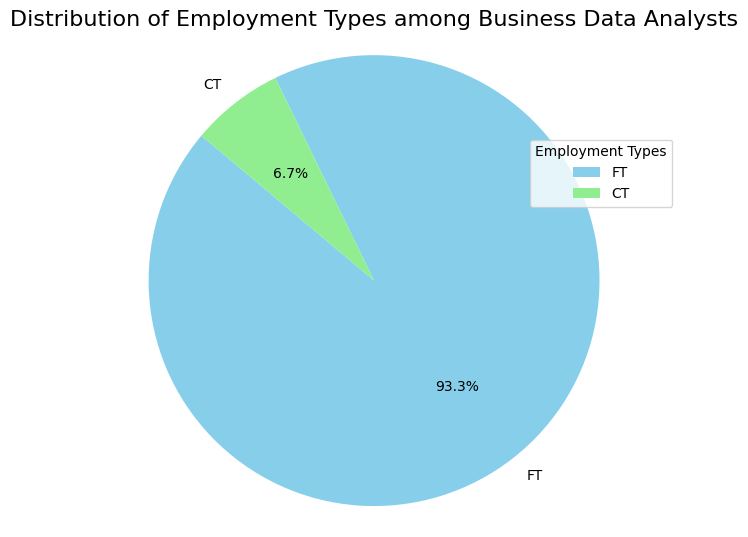

In [125]:

# Filter the DataFrame for Business Data Analysts
data_analysts = df[df['job_title'] == 'Business Data Analyst']

# Count the frequency of each employment type
employment_counts = data_analysts['employment_type'].value_counts()

# Create the pie chart
plt.figure(figsize=(6.4, 6.4))  # 20% smaller than (8, 8)
plt.pie(employment_counts, labels=employment_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgreen', 'salmon'])

# Add title
plt.title('Distribution of Employment Types among Business Data Analysts', fontsize=16)

# Add legend
plt.legend(employment_counts.index, title='Employment Types', loc='upper left', bbox_to_anchor=(0.8, 0.8))

# Show the chart
plt.axis('equal')  # To make the pie a circle
plt.show()

<div align="center">

#### *¿ In which country, in terms of company location, is there the highest rate of teleworking ?*
 
</div>

In [59]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [60]:
df['company_location']

0       ES
1       US
2       US
3       CA
4       CA
        ..
3750    US
3751    US
3752    US
3753    US
3754    IN
Name: company_location, Length: 3755, dtype: object

In [61]:
df['remote_ratio']

0       100
1       100
2       100
3       100
4       100
       ... 
3750    100
3751    100
3752    100
3753    100
3754     50
Name: remote_ratio, Length: 3755, dtype: int64

company_location
AR    100
KE    100
MY    100
NG    100
EG    100
CR    100
CF    100
CL    100
PH    100
PL    100
PR    100
SK    100
IR    100
Name: remote_ratio, dtype: int64

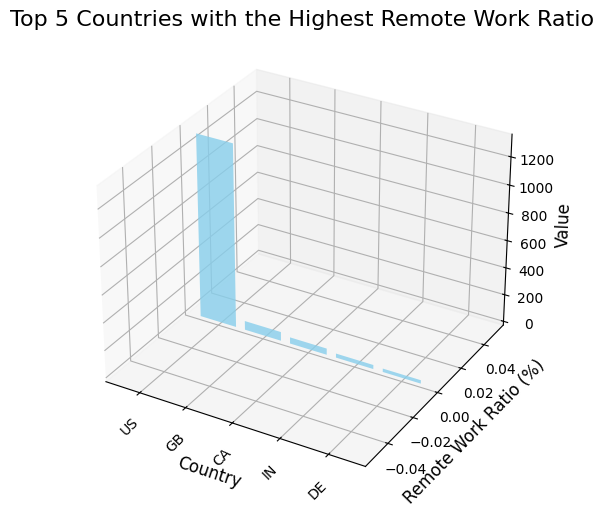

In [166]:

from mpl_toolkits.mplot3d import Axes3D

# Assuming you already have the DataFrame df with the 'remote_ratio' column
# Top 5 countries with the highest remote work ratio
top_5_remote_countries = df[df['remote_ratio'] == 100]['company_location'].value_counts().head(5).reset_index()
top_5_remote_countries.columns = ['location', 'remote_ratio']  # Rename columns

# Create the 3D chart
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Assign data to the coordinates
x = top_5_remote_countries['location']
y = top_5_remote_countries['remote_ratio']

# Convert country names into X coordinates
x_pos = range(len(x))

# Create the bar chart
ax.bar(x_pos, y, zs=0, zdir='y', alpha=0.8, color='skyblue')

# Label the axes
ax.set_title('Top 5 Countries with the Highest Remote Work Ratio', fontsize=16)
ax.set_xlabel('Country', fontsize=12)
ax.set_ylabel('Remote Work Ratio (%)', fontsize=12)
ax.set_zlabel('Value', fontsize=12)

# Configure the X axis labels
ax.set_xticks(x_pos)
ax.set_xticklabels(x, rotation=45)

# Show the chart
plt.show()